**Probability and Statistics Experiments with Python**
> copied from Thom Ives


What is the motivation for such an approach? The approach of coding math from scratch without libraries or modules? I like the way my dear friend and brother Manjunatha Gummaraju says it best.

> "Hand crafting (without libraries & automation) helps to get a firm grip on the subject, nuances & its applications. It also helps probably to author new innovative techniques from the ground up."

**Calculating (Sample) Mean and Standard Deviation**

$$ \mu = \frac {\sum x_i} {n};    \sigma = \sqrt {\frac {\sum (x_i - \mu)^2} {n} } $$

In [1]:
def mean(X):
    mu = sum(X) / len(X)

    return mu

In [2]:
def standard_deviation(X, mu=None):
    if not mu:
        mu = mean(X)
    sigma = (sum([(x - mu)**2 for x in X])/len(X))**0.5

    return sigma

**Normal Probability Distribution Function**

$ p = \frac {1}{\sigma \sqrt {2 \pi}} e^{- \frac{1}{2} \left( \frac {x - \mu}{ \sigma }\right)^2}$

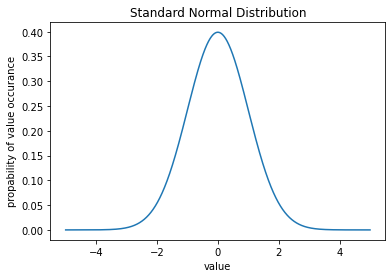

In [3]:
import matplotlib.pyplot as plt


def PDF(x, mean=0, std_dev=1):
    # define e and pi explicitly
    e = 2.718281828
    pi = 3.1415927
    # calculate in two steps
    p = 1.0 / (std_dev * ((2 * pi) ** 0.5))
    p *= e ** (-0.5 * ((x - mean)/std_dev)**2)
 
    return p


X = [(x - 1000)/200 for x in list(range(2001))]
P = [PDF(x) for x in X]
plt.plot(X, P)
plt.title(label="Standard Normal Distribution")
plt.xlabel(xlabel="value")
plt.ylabel(ylabel="propability of value occurance")
plt.show()

**Cummulative Normal Distribution Function**

$$ cdf = \int_{x_{left}}^{x_{right}} {\frac {1}{\sigma \sqrt {2 \pi}} e^{- \frac{1}{2} \left( \frac {x - \mu}{ \sigma }\right)^2}}$$

Total integral of PDF = 1.0


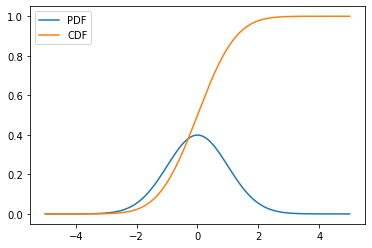

In [8]:
import matplotlib.pyplot as plt


def PDF(x, mean=0, std_dev=1):
    # define e and pi explicitly
    e = 2.718281828
    pi = 3.1415927
    # calculate in two steps
    p = 1.0 / (std_dev * ((2 * pi) ** 0.5))
    p *= e ** (-0.5 * ((x - mean)/std_dev)**2)
 
    return p


def CDF(mean=0, std_dev=1, x_left=-5, x_right=5, width=0.0001):
    CDF = 0
    X = []  # for plotting only
    CDF_y = []  # for plotting only
 
    x = x_left + width / 2
    while x < x_right:
        X.append(x)  # for plotting only
        panel = PDF(x, mean, std_dev) * width  # panel under PDF
        CDF += panel  # running sum of panels = integration
        CDF_y.append(CDF)  # for plotting only
        x += width  # current x value
       
    return CDF, X, CDF_y


total_integral, X, CDF_y = CDF()
P = [PDF(x) for x in X]
total_integral = round(total_integral, 5)
msg = f'Total integral of PDF = {total_integral}'
print(msg)
plt.plot(X, P, label="PDF")
plt.plot(X, CDF_y, label="CDF")
plt.legend()
plt.show()

**The Beta Distribution**

$$ f(x, \alpha, \beta) = \frac {1} {B(\alpha, \beta)} ; x^{\alpha - 1} ; (1 - x)^{\beta - 1} $$

$$ B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} dt $$

The total integral of beta_PDF is 1.0


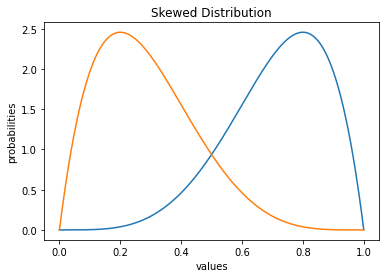

In [9]:
import matplotlib.pyplot as plt

class Beta_Distribution:
    def __init__(self, alpha, beta, panels=10000):
        self.alpha = alpha
        self.beta = beta
        self.panels = panels
        self.__Beta_Function__()
        
    def __Beta_Function__(self):
        width = 1 / self.panels
        X = [x/self.panels for x in range(self.panels)]
        # makes total integral of beta_PDF sum to 1
        self.B = sum(
            [(x**(self.alpha - 1) * \
             (1 - x)**(self.beta - 1)) * width
             for x in X])
    
    def beta_PDF(self, x):
        return x**(self.alpha - 1) * \
               (1 - x)**(self.beta - 1) / self.B


X = [x/1000 for x in range(1000+1)]
bd = Beta_Distribution(5, 2)
Y1 = [bd.beta_PDF(x) for x in X]
Y_integral = round(sum([y*0.001 for y in Y1]), 3)
bd = Beta_Distribution(2, 5)
Y2 = [bd.beta_PDF(x) for x in X]

print(f"The total integral of beta_PDF is {Y_integral}")
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.title(label="Skewed Distribution")
plt.xlabel(xlabel="values")
plt.ylabel(ylabel="probabilities")
plt.show()

**Student's T-Distribution**

$$ B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 -t) ^ {\beta - 1} $$

$$ PDF_t(t) = \frac {1} {\sqrt {\nu} B( \frac {1}{2}, \frac {\nu}{2})} \left( 1 + \frac {t^2}{\nu} \right) ^ {- \frac {\nu + 1}{2}} $$

In [10]:
class T_Distribution:
    def __init__(self, dof=9):
        self.beta = self.beta_function(0.5, dof/2)

        self.front = 1 / (dof ** 0.5 * self.beta)
        self.dof = dof
        self.power = -(dof + 1)/2

    def beta_function(self, x, y):
      pw = 1 / 1000000
      beta = 0
      t = pw / 2
      while t < 1.0:
          beta += t ** (x - 1) * (1 - t) ** (y - 1) * pw
          t += pw
  
      return beta
  
    def PDFt(self, t):
        # The t probability distribution method
        f_of_t = self.front * (1 + t**2/self.dof) ** self.power

        return f_of_t

    def CDFt(self, t_left, t_right): 
        # The t cummulative distribution method
        # We simply numerically integrate under the PDFt curve
        panels = self.dof * 100
        width = (t_right - t_left) / panels
        cdf = 0
        t = t_left
        prob = self.PDFt(t)
        # print(panels, width, prob)
        for i in range(panels):
            t += i * width
            prob = self.PDFt(t)
            cdf += prob * width

        return cdf

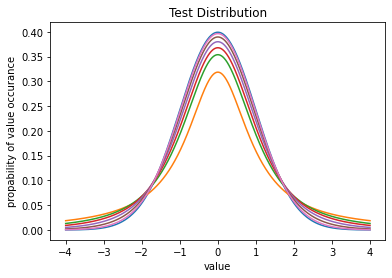

In [11]:
import matplotlib.pyplot as plt


def PDF(x, mean=0, std_dev=1):
    # define e and pi explicitly
    e = 2.718281828
    pi = 3.1415927
    # calculate in two steps
    p = 1.0 / (std_dev * ((2 * pi) ** 0.5))
    p *= e ** (-0.5 * ((x - mean)/std_dev)**2)
 
    return p


X = [(x - 1000)/250 for x in list(range(2001))]
P = [PDF(x) for x in X]
plt.plot(X, P)
for dof in [1, 2, 3, 5, 10, 30]:
    t_dist = T_Distribution(dof=dof)
    TP = [t_dist.PDFt(x) for x in X]
    plt.plot(X, TP)

plt.title(label="Test Distribution")
plt.xlabel(xlabel="value")
plt.ylabel(ylabel="propability of value occurance")
plt.show()

**Basic Determination Of Significance Value**

A Khan Academy Problem

In [14]:
X = [80]*5 + [82.5]*24 + [85]*72 + [87.5]*181 + [90]*281 + \
    [92.5]*272 + [95]*136 + [97.5]*27 + [100]*2

mu = mean(X)
std = standard_deviation(X, mu=mu)
print(mu, std)

90.54 3.362796455332963


In [15]:
the_85_and_less = [x for x in X if x <= 85]
percentage_LE_85 = len(the_85_and_less)/len(X)
print(percentage_LE_85)

0.101


**Basic Centerpoint Integration**

We start t at $\frac {w}{2}$ to use centerpoints for each panel.

There are other methods of numerical integration.

Centerpoint is pretty good at balancing areas above

and below the function being integrated.

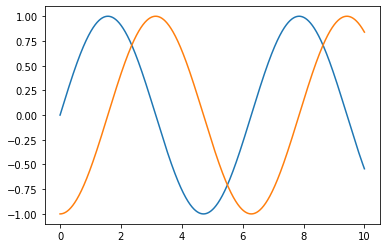

In [16]:
import matplotlib.pyplot as plt
import math

w = 1/1000
f_of_t = math.sin

T = [w/2]
S = [0]
C = [-1]
for t in range(10000):
    T.append(T[-1] + w)  # Our time step
    S.append(f_of_t(t*w))  # Our Function
    C.append(f_of_t(t*w)*w + C[-1])  # Integrating

plt.plot(T, S)
plt.plot(T, C)
plt.show()

**Null And Alternate Hypotheses Distributions With Dynamic Significance Level**

For the LaTeX in MatPlotLib Inside Colab, See: https://stackoverflow.com/a/62075348/996205

In [17]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-s

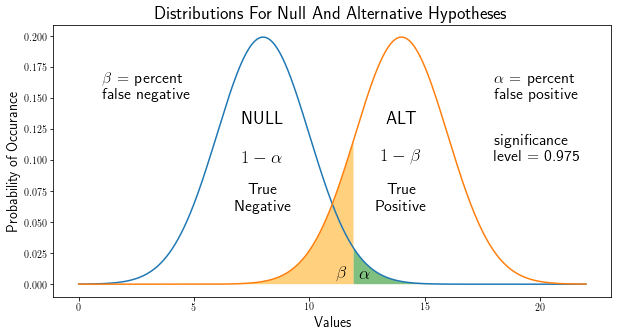

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean=0, std_dev=1):
    p = 1.0 / (std_dev * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean)/std_dev)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]
P2 = [PDF(x, 14, 2) for x in X]

C1 = []  # C2 = []
sum1 = 0  # sum2 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw  # sum2 += P2[i]*pw
    C1.append(sum1)  # C2.append(sum2)

SigLevels = [(v/2 + 90)/100 for v in range(17)]
SigLevels = [0.975]

for sl in SigLevels:
    for i in range(len(X)):
        if C1[i] > sl:
            sig_i = i
            break

    plt.figure(figsize = (10,5))
    plt.plot(X, P1)
    plt.plot(X, P2)

    plt.title(
        label="Distributions For Null And Alternative Hypotheses", fontsize=18)
    plt.xlabel(xlabel="Values", fontsize=14)
    plt.ylabel(ylabel="Probability of Occurance", fontsize=14)

    plt.fill_between(X[sig_i:], 0, P1[sig_i:], facecolor='green', alpha=0.5)
    plt.fill_between(X[:sig_i], 0, P2[:sig_i], facecolor='orange', alpha=0.5)

    plt.text(8, 0.13, 'NULL', fontsize=18, ha='center')
    plt.text(14, 0.13, 'ALT', fontsize=18, ha='center')

    plt.text(8, 0.06, 'True\nNegative', fontsize=16, ha='center')
    plt.text(14, 0.06, 'True\nPositive', fontsize=16, ha='center')

    plt.text(1, 0.15, r'$\beta$ = percent'+'\nfalse negative',
            fontsize=16, ha='left')
    plt.text(18, 0.15, r'$\alpha$ = percent'+'\nfalse positive',
            fontsize=16, ha='left')
    this_text = f'significance\nlevel = {round(sl, 3)}'
    plt.text(18, 0.10, this_text,
            fontsize=16, ha='left')

    plt.text(8, 0.1, r'$1 - \alpha$', fontsize=18, ha='center')
    plt.text(14, 0.1, r'$1 - \beta$', fontsize=18, ha='center')

    plt.text(X[sig_i] + 0.25, 0.005, r'$\alpha$', fontsize=18)
    plt.text(X[sig_i] - 0.75, 0.005, r'$\beta$', fontsize=18)

    plt.savefig(f'hypo_{round(sl, 3)}.png')
    plt.show()
    time.sleep(1)
    plt.figure().clear()

**Null And Alternate Hypotheses Distributions With Dynamic Alternative Mean**

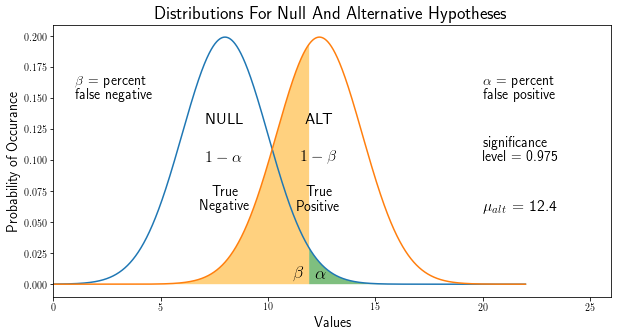

<Figure size 432x288 with 0 Axes>

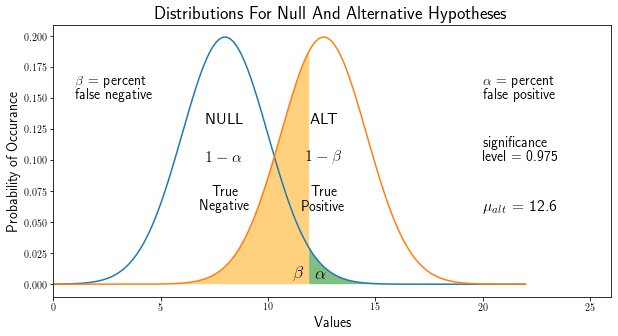

<Figure size 432x288 with 0 Axes>

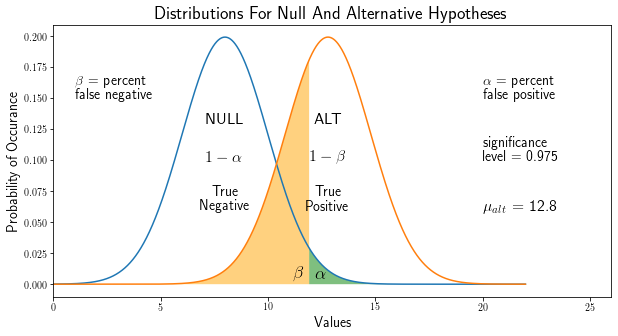

<Figure size 432x288 with 0 Axes>

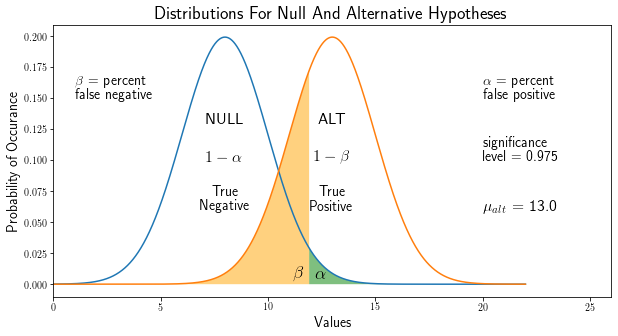

<Figure size 432x288 with 0 Axes>

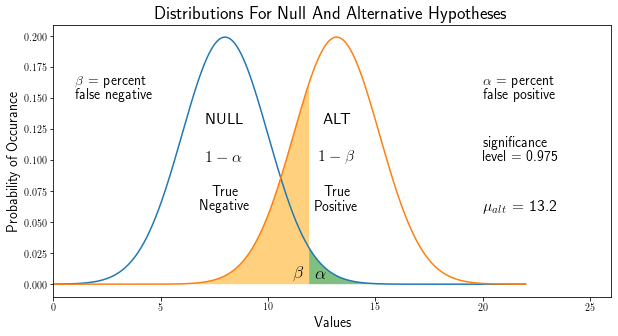

<Figure size 432x288 with 0 Axes>

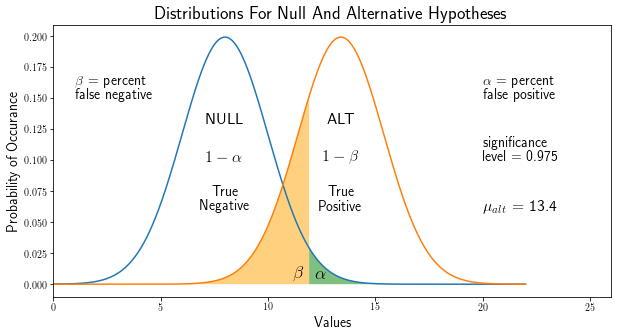

<Figure size 432x288 with 0 Axes>

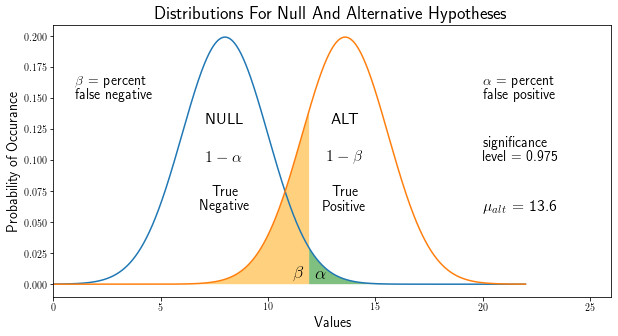

<Figure size 432x288 with 0 Axes>

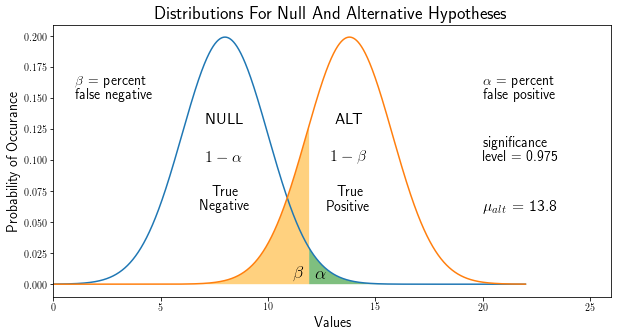

<Figure size 432x288 with 0 Axes>

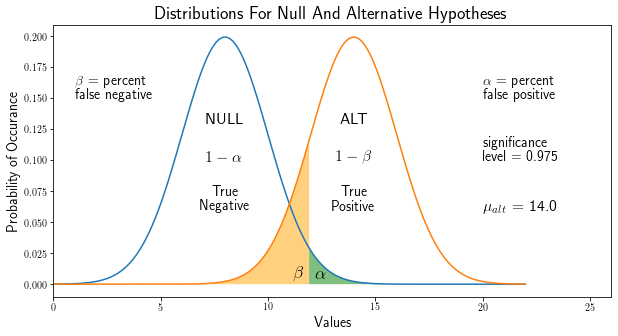

<Figure size 432x288 with 0 Axes>

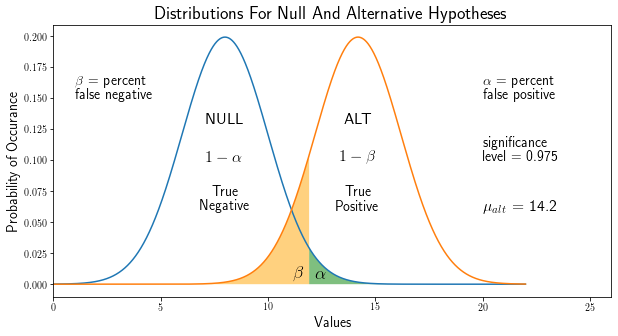

<Figure size 432x288 with 0 Axes>

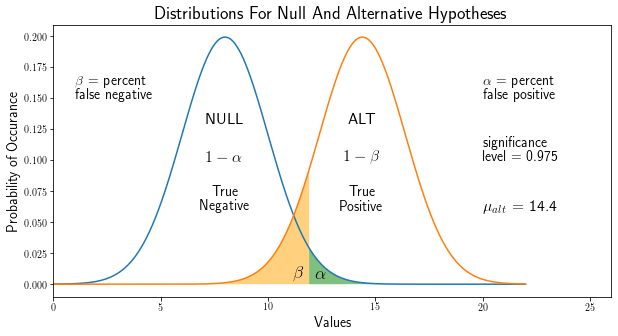

<Figure size 432x288 with 0 Axes>

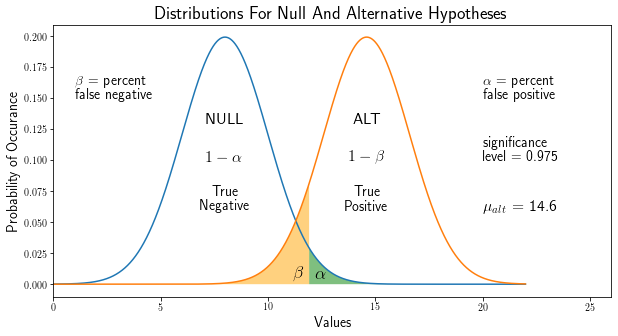

<Figure size 432x288 with 0 Axes>

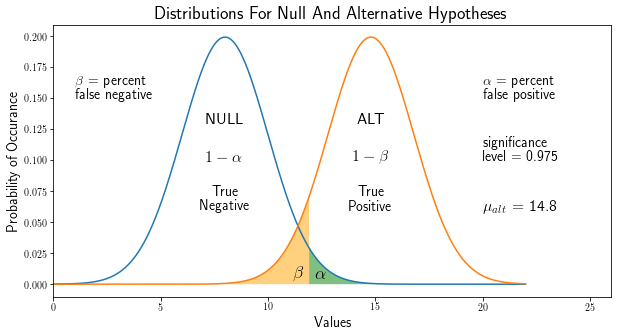

<Figure size 432x288 with 0 Axes>

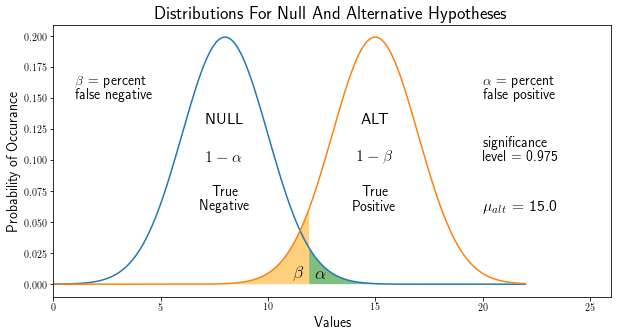

<Figure size 432x288 with 0 Axes>

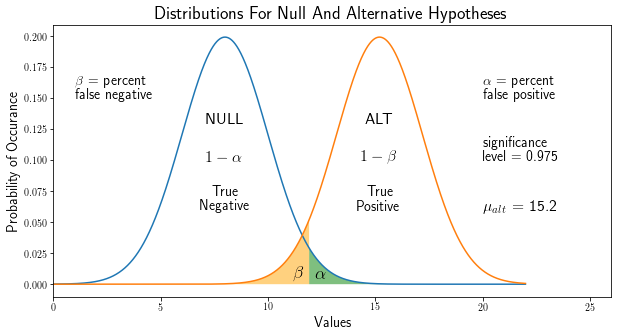

<Figure size 432x288 with 0 Axes>

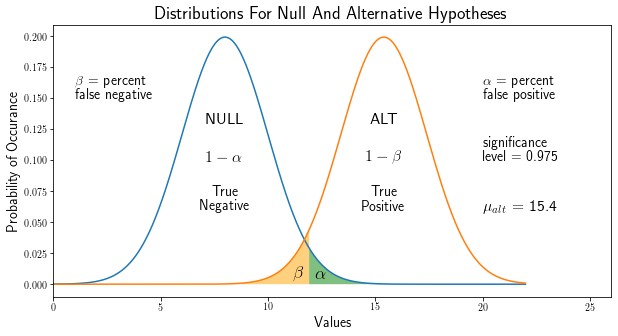

<Figure size 432x288 with 0 Axes>

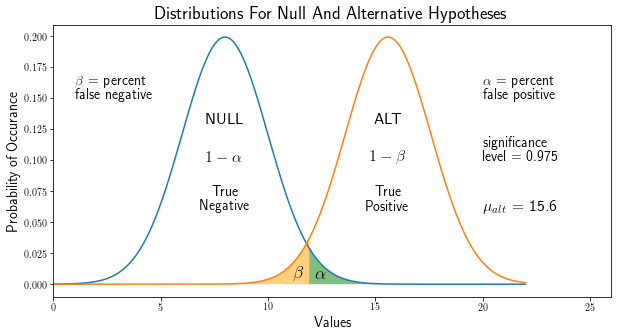

<Figure size 432x288 with 0 Axes>

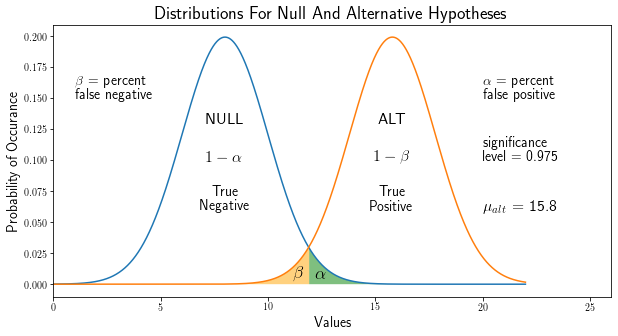

<Figure size 432x288 with 0 Axes>

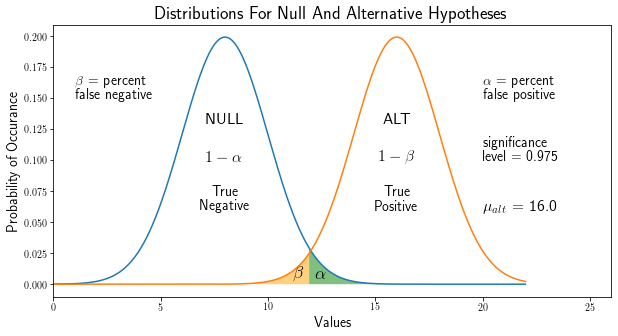

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean_=0, std_dev_=1):
    p = 1.0 / (std_dev_ * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean_)/std_dev_)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]

C1 = []  # C2 = []
sum1 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw
    C1.append(sum1)

sig_level = 0.975
for i in range(len(X)):
    if C1[i] > sig_level:
        sig_i = i
        break

for i in range(19):
    mu_alt = 12.4 + i * 0.2
    mu_alt = round(mu_alt, 1)

    P2 = [PDF(x, mu_alt, 2) for x in X]
    plt.figure(figsize = (10,5))
    plt.plot(X, P1)
    plt.plot(X, P2)

    plt.title(
        label="Distributions For Null And Alternative Hypotheses", fontsize=18)
    plt.xlabel(xlabel="Values", fontsize=14)
    plt.ylabel(ylabel="Probability of Occurance", fontsize=14)

    plt.fill_between(X[sig_i:], 0, P1[sig_i:], facecolor='green', alpha=0.5)
    plt.fill_between(X[:sig_i], 0, P2[:sig_i], facecolor='orange', alpha=0.5)

    plt.text(8, 0.13, 'NULL', fontsize=16, ha='center')
    plt.text(mu_alt, 0.13, 'ALT', fontsize=16, ha='center')

    plt.text(8, 0.06, 'True\nNegative', fontsize=14, ha='center')
    plt.text(mu_alt, 0.06, 'True\nPositive', fontsize=14, ha='center')

    plt.text(1, 0.15, r'$\beta$ = percent'+'\nfalse negative',
             fontsize=14, ha='left')
    plt.text(20, 0.15, r'$\alpha$ = percent'+'\nfalse positive',
             fontsize=14, ha='left')
    this_text = f'significance\nlevel = {round(sig_level, 3)}'
    plt.text(20, 0.10, this_text,
             fontsize=14, ha='left')
    plt.text(20, 0.06, r'$\mu_{alt}$' + f' = {mu_alt}',
             fontsize=16, ha='left')

    plt.text(8, 0.1, r'$1 - \alpha$', fontsize=16, ha='center')
    plt.text(mu_alt, 0.1, r'$1 - \beta$', fontsize=16, ha='center')


    plt.text(X[sig_i] + 0.25, 0.005, r'$\alpha$', fontsize=18)
    plt.text(X[sig_i] - 0.75, 0.005, r'$\beta$', fontsize=18)

    plt.xlim([0, 26])
    plt.savefig(f'hypos_{round(mu_alt, 1)}.png')
    plt.show()
    time.sleep(1)
    plt.figure().clear()